In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelFile
import matplotlib.pyplot as plt
import scipy.stats as stats


In [125]:
#get Data files and turn into DataFrames

nba_data_excel = "NBA+Data.xlsx"
player_data_excel = "player_heightweight_data(cleanedinches).xlsm"

nba_data_df = pd.read_excel(nba_data_excel)
height_weight_df = pd.read_excel(player_data_excel)


In [126]:
#drop N/A values in year: nba_data_df
nba_data_df['Year'] = nba_data_df.Year.fillna(0)

#convert year into integer value
nba_data_df['Year'] = nba_data_df.Year.astype(int)

#Change 'Player' column to 'name'
nba_data_df = nba_data_df.rename(columns={"Player":"name"})

#Preview nba_data_df

nba_data_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [127]:
#drop N/A values in year: nba_data_df
height_weight_df['weight'] = height_weight_df.weight.fillna(0)

#Convert weight into integer value: height_weight_df
height_weight_df['weight'] = height_weight_df.weight.astype(int)

#Preview
height_weight_df.head()

,name,position,weight,height (inches),height(feet)
0,Alaa Abdelnaby,F-C,240,82,6ft 10in
1,Zaid Abdul-Aziz,NaN,235,81,6ft 9in
2,Kareem Abdul-Jabbar,C,225,86,7ft 2in
3,Mahmoud Abdul-Rauf,G,162,73,6ft 1in
4,Tariq Abdul-Wahad,F,223,78,6ft 6in


In [128]:
#Merge Both DataFrames on: 'name' column

merged_df = pd.merge(nba_data_df, height_weight_df)
merged_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,176.0,NaN,NaN,NaN,217.0,458.0,G-F,170,71,5ft 11in
1,1951,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,77.0,NaN,NaN,NaN,97.0,202.0,G-F,170,71,5ft 11in
2,1950,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,109.0,NaN,NaN,NaN,99.0,279.0,G,185,74,6ft 2in
3,1951,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,115.0,NaN,NaN,NaN,98.0,152.0,G,185,74,6ft 2in
4,1952,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,0.343,...,70.0,NaN,NaN,NaN,56.0,126.0,G,185,74,6ft 2in


In [129]:

#remove 'unnamed' and position columns

complete_df = merged_df.drop(["Pos"],axis=1)

#preview DataFrame: complete_df
complete_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,1950,Curly Armstrong,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,...,176.0,NaN,NaN,NaN,217.0,458.0,G-F,170,71,5ft 11in
1,1951,Curly Armstrong,32.0,FTW,38.0,NaN,NaN,NaN,0.372,NaN,...,77.0,NaN,NaN,NaN,97.0,202.0,G-F,170,71,5ft 11in
2,1950,Cliff Barker,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,...,109.0,NaN,NaN,NaN,99.0,279.0,G,185,74,6ft 2in
3,1951,Cliff Barker,30.0,INO,56.0,NaN,NaN,NaN,0.322,NaN,...,115.0,NaN,NaN,NaN,98.0,152.0,G,185,74,6ft 2in
4,1952,Cliff Barker,31.0,INO,44.0,NaN,494.0,10.8,0.343,NaN,...,70.0,NaN,NaN,NaN,56.0,126.0,G,185,74,6ft 2in


In [131]:

#Filter Years to desired years: we want form 2000 to 2017

my_filter = complete_df.Year >= 1990
desired_years_df = complete_df[my_filter]

#Sort values by 'Years' column

desired_years_df = desired_years_df.sort_values(by=['Year'])

#Reset Index

desired_years_df = desired_years_df.reset_index()

#Delete 'index' column

desired_years_df = desired_years_df.drop(['index'], axis=1)

#preview DataFrame: desired_years_df

desired_years_df

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,1990,Jim Paxson,32.0,BOS,72.0,25.0,1283.0,9.7,0.498,0.047,...,137.0,33.0,5.0,54.0,115.0,460.0,F-G,200,78,6ft 6in
1,1990,Joe Wolf,25.0,LAC,77.0,19.0,1325.0,6.8,0.437,0.064,...,62.0,30.0,24.0,77.0,129.0,370.0,F-C,230,83,6ft 11in
2,1990,Reggie Williams,25.0,SAS,10.0,0.0,68.0,12.1,0.470,0.119,...,5.0,1.0,3.0,4.0,16.0,42.0,F,205,78,6ft 6in
3,1990,Reggie Williams,25.0,SAS,10.0,0.0,68.0,12.1,0.470,0.119,...,5.0,1.0,3.0,4.0,16.0,42.0,F-G,190,79,6ft 7in
4,1990,Reggie Williams,25.0,CLE,32.0,12.0,542.0,7.8,0.424,0.113,...,38.0,22.0,10.0,32.0,79.0,218.0,F,205,78,6ft 6in
5,1990,Quintin Dailey,29.0,SEA,30.0,2.0,491.0,10.0,0.459,0.021,...,34.0,12.0,0.0,34.0,63.0,247.0,G,180,75,6ft 3in
6,1990,Reggie Williams,25.0,CLE,32.0,12.0,542.0,7.8,0.424,0.113,...,38.0,22.0,10.0,32.0,79.0,218.0,F-G,190,79,6ft 7in
7,1990,Randy Allen,25.0,SAC,63.0,6.0,746.0,8.4,0.456,0.029,...,23.0,16.0,19.0,28.0,102.0,235.0,F,220,80,6ft 8in
8,1990,Reggie Williams,25.0,LAC,5.0,5.0,133.0,12.6,0.453,0.088,...,10.0,9.0,1.0,9.0,7.0,60.0,F,205,78,6ft 6in
9,1990,Reggie Williams,25.0,LAC,5.0,5.0,133.0,12.6,0.453,0.088,...,10.0,9.0,1.0,9.0,7.0,60.0,F-G,190,79,6ft 7in


In [8]:
desired_years_df.columns

Index(['Year', 'name', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'position', 'weight', 'height (inches)',
       'height(feet)'],
      dtype='object')

In [9]:
two_thousand = desired_years_df.loc[desired_years_df["Year"]==2000]

In [10]:
center = two_thousand.loc[two_thousand["position"]== "C"]
for_cent = two_thousand.loc[two_thousand["position"]== "F-C"]
forward = two_thousand.loc[two_thousand["position"]== "F"]

In [11]:
two_thousand_one = desired_years_df.loc[desired_years_df["Year"]==2001]

In [12]:
center_1 = two_thousand_one.loc[two_thousand_one["position"]== "C"]
for_cent_1 = two_thousand_one.loc[two_thousand_one["position"]== "F-C"]
forward_1 = two_thousand_one.loc[two_thousand_one["position"]== "F"]

In [13]:
two_thousand_two = desired_years_df.loc[desired_years_df["Year"]==2002]
center_2 = two_thousand_two.loc[two_thousand_two["position"]== "C"]
for_cent_2 = two_thousand_two.loc[two_thousand_two["position"]== "F-C"]
forward_2 = two_thousand_two.loc[two_thousand_two["position"]== "F"]

In [14]:
two_thousand_three = desired_years_df.loc[desired_years_df["Year"]==2003]
center_3 = two_thousand_three.loc[two_thousand_three["position"]== "C"]
for_cent_3 = two_thousand_three.loc[two_thousand_three["position"]== "F-C"]
forward_3 = two_thousand_three.loc[two_thousand_three["position"]== "F"]

In [15]:
two_thousand_four = desired_years_df.loc[desired_years_df["Year"]==2004]
center_4 = two_thousand_four.loc[two_thousand_four["position"]== "C"]
for_cent_4 = two_thousand_four.loc[two_thousand_four["position"]== "F-C"]
forward_4 = two_thousand_four.loc[two_thousand_four["position"]== "F"]

In [16]:
two_thousand_five = desired_years_df.loc[desired_years_df["Year"]==2005]
center_5 = two_thousand_five.loc[two_thousand_five["position"]== "C"]
for_cent_5 = two_thousand_five.loc[two_thousand_five["position"]== "F-C"]
forward_5 = two_thousand_five.loc[two_thousand_five["position"]== "F"]

In [17]:
two_thousand_six = desired_years_df.loc[desired_years_df["Year"]==2006]
center_6 = two_thousand_six.loc[two_thousand_six["position"]== "C"]
for_cent_6 = two_thousand_six.loc[two_thousand_six["position"]== "F-C"]
forward_6 = two_thousand_six.loc[two_thousand_six["position"]== "F"]

In [18]:
two_thousand_seven = desired_years_df.loc[desired_years_df["Year"]==2007]
center_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "C"]
for_cent_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "F-C"]
forward_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "F"]

In [19]:
two_thousand_eight = desired_years_df.loc[desired_years_df["Year"]==2008]
center_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "C"]
for_cent_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "F-C"]
forward_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "F"]

In [20]:
two_thousand_nine = desired_years_df.loc[desired_years_df["Year"]==2009]
center_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "C"]
for_cent_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "F-C"]
forward_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "F"]

In [21]:
two_thousand_ten = desired_years_df.loc[desired_years_df["Year"]==2010]
center_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "C"]
for_cent_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "F-C"]
forward_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "F"]

In [22]:
two_thousand_eleven = desired_years_df.loc[desired_years_df["Year"]==2011]
center_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "C"]
for_cent_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "F-C"]
forward_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "F"]

In [23]:
two_thousand_twelve = desired_years_df.loc[desired_years_df["Year"]==2012]
center_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "C"]
for_cent_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "F-C"]
forward_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "F"]

In [24]:
two_thousand_thirteen = desired_years_df.loc[desired_years_df["Year"]==2013]
center_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "C"]
for_cent_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "F-C"]
forward_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "F"]

In [25]:
two_thousand_fourteen = desired_years_df.loc[desired_years_df["Year"]==2014]
center_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "C"]
for_cent_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "F-C"]
forward_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "F"]

In [26]:
two_thousand_fifteen = desired_years_df.loc[desired_years_df["Year"]==2015]
center_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "C"]
for_cent_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "F-C"]
forward_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "F"]

In [27]:
two_thousand_sixteen = desired_years_df.loc[desired_years_df["Year"]==2016]
center_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "C"]
for_cent_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "F-C"]
forward_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "F"]

In [28]:
two_thousand_seventeen = desired_years_df.loc[desired_years_df["Year"]==2017]
center_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "C"]
for_cent_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "F-C"]
forward_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "F"]

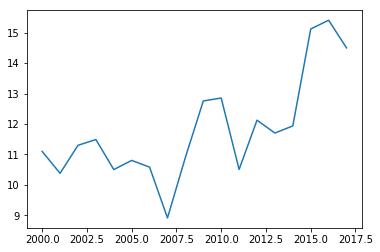

In [29]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [center["PER"].mean(),center_1["PER"].mean(),center_2["PER"].mean(), center_3["PER"].mean(), center_4["PER"].mean(), 
center_5["PER"].mean(), center_6["PER"].mean(), center_7["PER"].mean(), center_8["PER"].mean(), center_9["PER"].mean(),
center_10["PER"].mean(), center_11["PER"].mean(), center_12["PER"].mean(), center_13["PER"].mean(), center_14["PER"].mean(),
center_15["PER"].mean(),center_16["PER"].mean(),center_17["PER"].mean()]
plt.savefig("Logan_Images/PER Plot.png")
plt.plot(x,y)

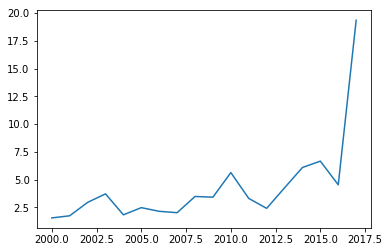

In [30]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [center["3PA"].mean(),center_1["3PA"].mean(),center_2["3PA"].mean(), center_3["3PA"].mean(), center_4["3PA"].mean(), 
center_5["3PA"].mean(), center_6["3PA"].mean(), center_7["3PA"].mean(), center_8["3PA"].mean(), center_9["3PA"].mean(),
center_10["3PA"].mean(), center_11["3PA"].mean(), center_12["3PA"].mean(), center_13["3PA"].mean(), center_14["3PA"].mean(),
center_15["3PA"].mean(),center_16["3PA"].mean(),center_17["3PA"].mean()]
plt.savefig("Logan_Images/3PA Plot.png")
plt.plot(x,y)

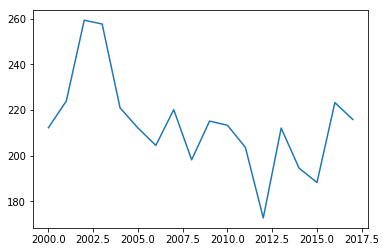

In [31]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [forward["TRB"].mean(),forward_1["TRB"].mean(),forward_2["TRB"].mean(), forward_3["TRB"].mean(), forward_4["TRB"].mean(), 
forward_5["TRB"].mean(), forward_6["TRB"].mean(), forward_7["TRB"].mean(), forward_8["TRB"].mean(), forward_9["TRB"].mean(),
forward_10["TRB"].mean(), forward_11["TRB"].mean(), forward_12["TRB"].mean(), forward_13["TRB"].mean(), forward_14["TRB"].mean(),
forward_15["TRB"].mean(),forward_16["TRB"].mean(),forward_17["TRB"].mean()]
plt.savefig("Logan_Images/Forward TRB Plot.png")
plt.plot(x,y)

<BarContainer object of 18 artists>

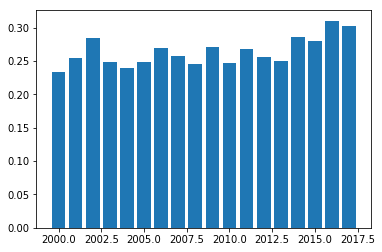

In [32]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [forward["3P%"].mean(),forward_1["3P%"].mean(),forward_2["3P%"].mean(), forward_3["3P%"].mean(), forward_4["3P%"].mean(), 
forward_5["3P%"].mean(), forward_6["3P%"].mean(), forward_7["3P%"].mean(), forward_8["3P%"].mean(), forward_9["3P%"].mean(),
forward_10["3P%"].mean(), forward_11["3P%"].mean(), forward_12["3P%"].mean(), forward_13["3P%"].mean(), forward_14["3P%"].mean(),
forward_15["3P%"].mean(),forward_16["3P%"].mean(),forward_17["3P%"].mean()]
plt.savefig("Logan_Images/Forward 3P% Plot.png")
plt.bar(x,y)

In [33]:
forward_17

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
9599,2017,Ersan Ilyasova,29.0,PHI,53.0,40.0,1447.0,15.4,0.553,0.460,...,97.0,33.0,14.0,78.0,133.0,786.0,F,235,82,6ft 10in
9602,2017,Ersan Ilyasova,29.0,TOT,82.0,52.0,2142.0,14.6,0.546,0.452,...,141.0,58.0,23.0,116.0,211.0,1071.0,F,235,82,6ft 10in
9604,2017,Matt Barnes,36.0,TOT,74.0,18.0,1777.0,10.3,0.514,0.556,...,194.0,48.0,26.0,107.0,185.0,527.0,F,226,79,6ft 7in
9605,2017,Ryan Kelly,25.0,ATL,16.0,0.0,110.0,7.8,0.408,0.357,...,8.0,4.0,5.0,4.0,5.0,25.0,F,230,83,6ft 11in
9606,2017,Jake Layman,22.0,POR,35.0,1.0,249.0,4.9,0.404,0.573,...,11.0,9.0,3.0,11.0,22.0,78.0,F,210,81,6ft 9in
9609,2017,Matt Barnes,36.0,SAC,54.0,13.0,1367.0,10.2,0.501,0.551,...,149.0,36.0,17.0,83.0,138.0,413.0,F,226,79,6ft 7in
9614,2017,Taurean Waller-Prince,22.0,ATL,59.0,10.0,981.0,9.8,0.513,0.358,...,55.0,43.0,27.0,61.0,96.0,335.0,F,220,80,6ft 8in
9617,2017,Otto Porter,23.0,WAS,80.0,80.0,2605.0,17.3,0.628,0.425,...,121.0,116.0,41.0,43.0,193.0,1075.0,F,198,80,6ft 8in
9619,2017,Jae Crowder,26.0,BOS,72.0,72.0,2335.0,14.9,0.613,0.547,...,155.0,72.0,23.0,79.0,161.0,999.0,F,235,78,6ft 6in
9621,2017,Brandon Bass,31.0,LAC,52.0,0.0,577.0,19.7,0.650,0.016,...,21.0,14.0,11.0,29.0,45.0,292.0,F,250,80,6ft 8in


In [34]:
#Drop N/A values in 'Pos' column
#desired_years_df["Pos"] = complete_df.Pos.dropna()

#Groupby year

grouped_df = desired_years_df.groupby(['Year','position'])
avg_weight = grouped_df['weight'].mean()

#avg_weight_df = avg_weight_df.rename(columns={"Year":"Year",
                                             #"position":"Position",
                                             #"weight":"Weight"})

In [35]:
avg_weight.reset_index()

,Year,position,weight
0,2000,C,250.792453
1,2000,C-F,231.250000
2,2000,F,228.033113
3,2000,F-C,231.851852
4,2000,F-G,213.428571
5,2000,G,187.929936
6,2000,G-F,205.902439
7,2001,C,252.260870
8,2001,C-F,234.000000
9,2001,F,227.705521


In [36]:
type(avg_weight)

pandas.core.series.Series

In [37]:
avg_weight_df = avg_weight.to_frame()

In [38]:
avg_weight_df

weight
Year position            
2000 C         250.792453
     C-F       231.250000
     F         228.033113
     F-C       231.851852
     F-G       213.428571
     G         187.929936
     G-F       205.902439
2001 C         252.260870
     C-F       234.000000
     F         227.705521
     F-C       232.560000
     F-G       209.894737
     G         188.916201
     G-F       205.225806
2002 C         252.493151
     C-F       239.375000
     F         229.820896
     F-C       235.680851
     F-G       214.105263
     G         190.176136
     G-F       210.548387
2003 C         249.825397
     C-F       241.125000
     F         233.103704
     F-C       238.039216
     F-G       218.000000
     G         192.228070
     G-F       211.000000
2004 C         251.569767
     C-F       230.818182
...                   ...
2013 G         195.909091
     G-F       215.250000
2014 C         257.636364
     C-F       249.090909
     F         229.966102
     F-C       249.000000
     F-G       217.739130
     G         195.220264
     G-F       212.416667
2015 C         256.000000
     C-F       247.346154
     F         230.208092
     F-C       244.779661
     F-G       214.500000
     G         193.672000
     G-F       213.000000
2016 C         255.551020
     C-F       248.800000
     F         231.902098
     F-C       246.078125
     F-G       220.000000
     G         193.709821
     G-F       215.400000
2017 C         257.285714
     C-F       246.421053
     F         229.642384
     F-C       243.723404
     F-G       216.812500
     G         194.769585
     G-F       213.533333

[126 rows x 1 columns]

In [39]:
type(avg_weight_df)

pandas.core.frame.DataFrame

In [40]:
avg_weight_df = avg_weight_df.reset_index()

In [41]:
avg_weight_df

,Year,position,weight
0,2000,C,250.792453
1,2000,C-F,231.250000
2,2000,F,228.033113
3,2000,F-C,231.851852
4,2000,F-G,213.428571
5,2000,G,187.929936
6,2000,G-F,205.902439
7,2001,C,252.260870
8,2001,C-F,234.000000
9,2001,F,227.705521


In [42]:
test = avg_weight_df.loc[avg_weight_df["position"]=="C"]

In [43]:
test

,Year,position,weight
0,2000,C,250.792453
7,2001,C,252.260870
14,2002,C,252.493151
21,2003,C,249.825397
28,2004,C,251.569767
35,2005,C,253.229730
42,2006,C,258.442857
49,2007,C,258.086207
56,2008,C,253.577465
63,2009,C,253.480519


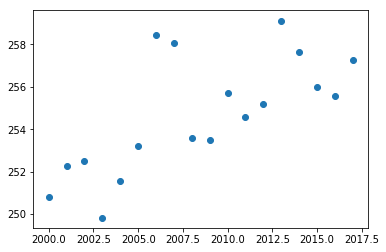

In [44]:
plt.scatter(test["Year"], test["weight"])

In [45]:
new_df = desired_years_df.groupby(['Year','position'])
avg_height = new_df["height (inches)"].mean()
avg_height.reset_index()

,Year,position,height (inches)
0,2000,C,84.226415
1,2000,C-F,82.625000
2,2000,F,80.304636
3,2000,F-C,81.833333
4,2000,F-G,79.333333
5,2000,G,74.751592
6,2000,G-F,78.000000
7,2001,C,84.014493
8,2001,C-F,82.800000
9,2001,F,80.319018


In [46]:
avg_height_df = avg_height.to_frame()

In [47]:
logan = avg_height_df.reset_index()

In [48]:
logan

,Year,position,height (inches)
0,2000,C,84.226415
1,2000,C-F,82.625000
2,2000,F,80.304636
3,2000,F-C,81.833333
4,2000,F-G,79.333333
5,2000,G,74.751592
6,2000,G-F,78.000000
7,2001,C,84.014493
8,2001,C-F,82.800000
9,2001,F,80.319018


In [49]:
test2 = logan.loc[logan["position"]=="C"]

In [50]:
test2

,Year,position,height (inches)
0,2000,C,84.226415
7,2001,C,84.014493
14,2002,C,83.863014
21,2003,C,84.095238
28,2004,C,84.081395
35,2005,C,84.081081
42,2006,C,84.100000
49,2007,C,83.948276
56,2008,C,84.098592
63,2009,C,84.103896


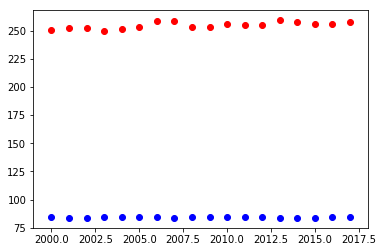

In [51]:
plt.scatter(test["Year"], test["weight"], color = "red")
plt.scatter(test2["Year"], test2["height (inches)"], color = "blue")

In [52]:
# While height has remained relatively constant, weight has increased. 

In [53]:
##########################################################################################################################

In [54]:
#doing a group by to show number of shots (2vs3) by each team by year
second_grouped_df = desired_years_df.groupby(['Tm','Year'])
avg_twos = second_grouped_df['2PA'].sum()
avg_threes = second_grouped_df["3PA"].sum()


In [55]:
#average number of 2 point attempts by team by year
avg_twos

Tm   Year
ATL  2000    5420.0
     2001    5381.0
     2002    5416.0
     2003    6278.0
     2004    5280.0
     2005    5699.0
     2006    5342.0
     2007    5334.0
     2008    5474.0
     2009    4818.0
     2010    5346.0
     2011    5002.0
     2012    4018.0
     2013    4743.0
     2014    4572.0
     2015    4547.0
     2016    4700.0
     2017    5330.0
BOS  2000    5620.0
     2001    4852.0
     2002    4785.0
     2003    4354.0
     2004    5100.0
     2005    4663.0
     2006    5032.0
     2007    5171.0
     2008    4722.0
     2009    4978.0
     2010    4861.0
     2011    4902.0
              ...  
UTA  2008    5497.0
     2009    5501.0
     2010    5368.0
     2011    5334.0
     2012    4686.0
     2013    5325.0
     2014    5075.0
     2015    4737.0
     2016    4732.0
     2017    4386.0
VAN  2000    5543.0
     2001    5592.0
WAS  2000    5174.0
     2001    5451.0
     2002    4607.0
     2003    4111.0
     2004    5287.0
     2005    5286.0
     2006 

In [56]:
#average number of 3 point attempts by team by year
avg_threes

Tm   Year
ATL  2000     814.0
     2001     933.0
     2002    1194.0
     2003    1404.0
     2004    1249.0
     2005     973.0
     2006    1154.0
     2007    1038.0
     2008    1078.0
     2009    1633.0
     2010    1455.0
     2011    1427.0
     2012    1330.0
     2013    1901.0
     2014    2116.0
     2015    2152.0
     2016    2469.0
     2017    2631.0
BOS  2000    1260.0
     2001    1633.0
     2002    1946.0
     2003    2155.0
     2004    1825.0
     2005    1123.0
     2006    1290.0
     2007    1283.0
     2008    1564.0
     2009    1355.0
     2010    1433.0
     2011    1119.0
              ...  
UTA  2008    1095.0
     2009    1122.0
     2010    1207.0
     2011    1256.0
     2012     845.0
     2013    1385.0
     2014    1577.0
     2015    1819.0
     2016    2055.0
     2017    2128.0
VAN  2000     898.0
     2001     947.0
WAS  2000     650.0
     2001     716.0
     2002     733.0
     2003     756.0
     2004    1269.0
     2005    1498.0
     2006 

In [57]:
#creating a DF of average number of 2's and 3's COMBINED for each year in the NBA
shot_type = desired_years_df.groupby(['Year'])

In [58]:
sum_twos = shot_type['2PA'].sum()
sum_threes = shot_type["3PA"].sum()

In [59]:
sum_twos

Year
2000    157071.0
2001    161385.0
2002    155925.0
2003    154995.0
2004    169664.0
2005    171431.0
2006    163713.0
2007    160776.0
2008    168439.0
2009    168261.0
2010    172189.0
2011    178364.0
2012    133778.0
2013    164546.0
2014    166571.0
2015    172234.0
2016    160038.0
2017    157314.0
Name: 2PA, dtype: float64

In [60]:
sum_threes

Year
2000    32300.0
2001    33132.0
2002    36084.0
2003    36055.0
2004    39045.0
2005    43393.0
2006    42477.0
2007    44387.0
2008    48417.0
2009    50463.0
2010    49262.0
2011    53211.0
2012    38474.0
2013    53046.0
2014    59197.0
2015    64253.0
2016    64288.0
2017    73989.0
Name: 3PA, dtype: float64

In [61]:
#grouping 2PA by year
twos = desired_years_df.groupby("position")

In [62]:
twos_yearly = desired_years_df.groupby(["Year", "position"])
two_attemps = twos_yearly["2PA"].sum()
two_attemps.reset_index()

,Year,position,2PA
0,2000,C,12832.0
1,2000,C-F,2967.0
2,2000,F,45509.0
3,2000,F-C,22183.0
4,2000,F-G,7443.0
5,2000,G,48587.0
6,2000,G-F,17550.0
7,2001,C,13544.0
8,2001,C-F,2880.0
9,2001,F,50238.0


In [63]:
#grouping 3PA by year
threes = desired_years_df.groupby("position")

In [64]:
threes_yearly = desired_years_df.groupby(["Year", "position"])
three_attemps = threes_yearly["3PA"].sum()
three_attemps.reset_index()

,Year,position,3PA
0,2000,C,82.0
1,2000,C-F,33.0
2,2000,F,6622.0
3,2000,F-C,1474.0
4,2000,F-G,2408.0
5,2000,G,16670.0
6,2000,G-F,5011.0
7,2001,C,120.0
8,2001,C-F,32.0
9,2001,F,7882.0


In [65]:
#extracting number of made 3's by position by year
threes = desired_years_df.groupby("position")

In [66]:
threes_yearly = desired_years_df.groupby(["Year", "position"])
three_makes = threes_yearly["3PA"].sum()
three_makes.reset_index()

,Year,position,3PA
0,2000,C,82.0
1,2000,C-F,33.0
2,2000,F,6622.0
3,2000,F-C,1474.0
4,2000,F-G,2408.0
5,2000,G,16670.0
6,2000,G-F,5011.0
7,2001,C,120.0
8,2001,C-F,32.0
9,2001,F,7882.0


In [67]:
#isolating percentages of 3PA made by position by year
threes_yearly = desired_years_df.groupby(["Year", "position"])
three_per = threes_yearly["3P%"].sum()
three_per.reset_index()

,Year,position,3P%
0,2000,C,2.386
1,2000,C-F,1.363
2,2000,F,27.323
3,2000,F-C,7.077
4,2000,F-G,5.182
5,2000,G,47.205
6,2000,G-F,11.768
7,2001,C,2.620
8,2001,C-F,0.125
9,2001,F,33.087


In [68]:
#player efficency rating by position by year(max)
#i chose to isolate it by the max here just to show how big men are more effienct. next cell below will calculate total by position.
per = desired_years_df.groupby(["Year", "position"])
pos_per = per["PER"].max()
pos_per.reset_index()

,Year,position,PER
0,2000,C,19.6
1,2000,C-F,19.0
2,2000,F,20.6
3,2000,F-C,25.6
4,2000,F-G,25.2
5,2000,G,44.0
6,2000,G-F,23.4
7,2001,C,20.3
8,2001,C-F,20.9
9,2001,F,24.4


In [69]:
#player efficency rating by position by year (sum)
per = desired_years_df.groupby(["Year", "position"])
pos_per = per["PER"].sum()
pos_per.reset_index()

,Year,position,PER
0,2000,C,588.3
1,2000,C-F,105.8
2,2000,F,1712.7
3,2000,F-C,721.4
4,2000,F-G,270.2
5,2000,G,1957.9
6,2000,G-F,499.8
7,2001,C,716.2
8,2001,C-F,132.9
9,2001,F,1914.4


In [70]:
#player efficency rating by position by year (mean)
per = desired_years_df.groupby(["Year", "position"])
pos_per = per["PER"].mean()
pos_per.reset_index()

,Year,position,PER
0,2000,C,11.100000
1,2000,C-F,13.225000
2,2000,F,11.342384
3,2000,F-C,13.359259
4,2000,F-G,12.866667
5,2000,G,12.470701
6,2000,G-F,12.190244
7,2001,C,10.379710
8,2001,C-F,13.290000
9,2001,F,11.744785


In [71]:
#mintues played by position
min = desired_years_df.groupby(["Year", "position"])
min_per = per["MP"].mean()
min_per.reset_index()

,Year,position,MP
0,2000,C,880.867925
1,2000,C-F,1298.375000
2,2000,F,1037.582781
3,2000,F-C,1331.740741
4,2000,F-G,1331.142857
5,2000,G,1201.267516
6,2000,G-F,1477.024390
7,2001,C,747.550725
8,2001,C-F,1077.200000
9,2001,F,1086.171779


In [72]:
#looking at average assist numbers by pos
#player efficency rating by position by year (mean)
assist = desired_years_df.groupby(["Year", "position"])
assist_per = assist["AST"].mean()
assist_per.reset_index()

,Year,position,AST
0,2000,C,35.754717
1,2000,C-F,44.875000
2,2000,F,64.278146
3,2000,F-C,77.018519
4,2000,F-G,108.380952
5,2000,G,173.038217
6,2000,G-F,134.902439
7,2001,C,26.971014
8,2001,C-F,33.200000
9,2001,F,63.858896


In [73]:
#looking at win shares by position by year
win_share = desired_years_df.groupby(["Year", "position"])
ws_pos = win_share["WS"].sum()
ws_pos.reset_index()

,Year,position,WS
0,2000,C,80.9
1,2000,C-F,24.7
2,2000,F,298.8
3,2000,F-C,171.1
4,2000,F-G,59.9
5,2000,G,350.9
6,2000,G-F,128.7
7,2001,C,85.4
8,2001,C-F,25.6
9,2001,F,349.9


In [74]:
############################3/26##############################################

In [136]:
#if statement grouping all big men into a new column called 'Big Men'
#groupby 'big men' and then grab only values for each year you need
# create a dataframe that only grabs the column 'big men'

#desired_years_df["bm"] = desired_years_df.eval("position == 'C' or 'position' == 'F' or position == 'F-C' or positon == 'C-F'") # , 
#                                                inplace = True)


def f(row):
    if row ['position'] == 'C' or row ['position'] == 'F' or row ['position'] == 'C-F' or row ['position'] == 'F-C':
        val = 'bm'
    else: 
        val = 'sm' 
    return val

desired_years_df['bm'] = desired_years_df.apply(f, axis = 1)

#print(desired_years_df[['position','bm']])
type(desired_years_df)
desired_years_df.columns

Index(['Year', 'name', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'position', 'weight', 'height (inches)',
       'height(feet)', 'bm'],
      dtype='object')

In [137]:
sm_df = desired_years_df.groupby(['Year','bm'])
#sm_df.head()
type(sm_df)

sm_df.groups
sm_df.MP.mean()

Year  bm
1990  bm    1101.156951
      sm    1205.869369
1991  bm    1192.509009
      sm    1258.215686
1992  bm    1147.580189
      sm    1146.527897
1993  bm    1080.042017
      sm    1324.463542
1994  bm    1028.417323
      sm    1234.071429
1995  bm    1190.328889
      sm    1201.952830
1996  bm    1030.574913
      sm    1224.039370
1997  bm     976.196667
      sm    1127.377358
1998  bm    1072.756184
      sm    1143.643939
1999  bm     682.288462
      sm     720.462185
2000  bm    1073.917293
      sm    1265.347032
2001  bm    1065.017123
      sm    1232.327511
2002  bm    1144.641221
      sm    1226.703540
2003  bm    1174.035019
      sm    1275.188940
2004  bm    1010.583072
      sm    1220.073643
2005  bm    1050.369775
      sm    1207.785714
2006  bm    1050.516556
      sm    1225.615385
2007  bm    1116.920000
      sm    1312.465021
2008  bm     995.906542
      sm    1172.903915
2009  bm    1040.137821
      sm    1217.397059
2010  bm    1088.367213
      s

In [138]:

y = sm_df.MP.mean()
sample = y.reset_index()

sample.head()
#plt.bar(sample['Year'], sample.MP)

sample_bm = sample.loc[sample["bm"]=="bm"]

In [139]:
sample_bm

,Year,bm,MP
0,1990,bm,1101.156951
2,1991,bm,1192.509009
4,1992,bm,1147.580189
6,1993,bm,1080.042017
8,1994,bm,1028.417323
10,1995,bm,1190.328889
12,1996,bm,1030.574913
14,1997,bm,976.196667
16,1998,bm,1072.756184
18,1999,bm,682.288462


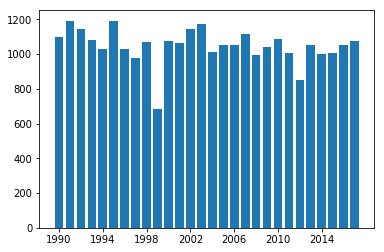

<Figure size 7200x7200 with 0 Axes>

In [146]:
plt.bar(sample_bm['Year'],sample_bm['MP'])
plt.xticks(np.arange(1990,2018, step=4))
plt.figure(figsize=(100,100))

plt.show()

In [141]:
sm_df = desired_years_df.groupby(['Year','bm'])
#sm_df.head()
sm_df.groups

#isolating free throw attempts
sm_df.PER.mean()

Year  bm
1990  bm    11.198206
      sm    11.589189
1991  bm    12.560811
      sm    12.931373
1992  bm    12.089151
      sm    11.952790
1993  bm    12.493277
      sm    12.782292
1994  bm    12.474803
      sm    12.200952
1995  bm    11.775556
      sm    12.520755
1996  bm    11.631010
      sm    12.793307
1997  bm    11.404333
      sm    12.076604
1998  bm    12.184806
      sm    12.140909
1999  bm    11.084231
      sm    12.299160
2000  bm    11.760150
      sm    12.456164
2001  bm    11.651712
      sm    11.858952
2002  bm    12.647328
      sm    12.180973
2003  bm    11.863035
      sm    12.018433
2004  bm    11.931661
      sm    11.786822
2005  bm    12.370740
      sm    12.163910
2006  bm    11.787375
      sm    11.752510
2007  bm    11.736727
      sm    12.402058
2008  bm    12.017500
      sm    11.711032
2009  bm    13.286859
      sm    11.970588
2010  bm    12.686885
      sm    12.148897
2011  bm    12.086628
      sm    12.276140
2012  bm    12.939274
 

In [142]:
y = sm_df.PER.mean()
per = y.reset_index()

per.head()
#plt.bar(sample['Year'], sample.MP)

per_bm = per.loc[per["bm"]=="bm"]
per_sm = per.loc[per["bm"]=="sm"]

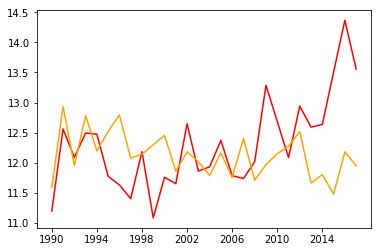

<Figure size 7200x7200 with 0 Axes>

In [145]:
plt.plot(per_bm['Year'],per_bm['PER'], color = "red")
plt.plot(per_sm["Year"], per_sm["PER"], color = "orange")
plt.xticks(np.arange(1990,2018, step=4))
plt.figure(figsize=(100,100))

plt.show()

In [167]:
y = sm_df["3PA"].sum()
three_attempts = y.reset_index()

three_attempts.head()
#plt.bar(sample['Year'], sample.MP)

threes_bm = three_attempts.loc[three_attempts["bm"]=="bm"]
threes_sm = three_attempts.loc[three_attempts["bm"]=="sm"]

In [168]:
threes_bm

,Year,bm,3PA
0,1990,bm,2796.0
2,1991,bm,3559.0
4,1992,bm,3291.0
6,1993,bm,4230.0
8,1994,bm,5094.0
10,1995,bm,9148.0
12,1996,bm,8897.0
14,1997,bm,8481.0
16,1998,bm,7110.0
18,1999,bm,3884.0
